# Imputation
1. Univariate Imputation (SimpleImputer)
Imputes each feature independently of others.
Replaces missing values in a column based only on values in that column.

Methods:
- Mean
- Median
- Mode (most frequent)
- Constant value

2. Multivariate Imputation (IterativeImputer or KNNImputer)
Uses other features in the dataset to estimate missing values.
Captures relationships between multiple columns.

Good for:
- When missingness may depend on multiple variables
- More accurate when data is correlated



# KNN Imputer
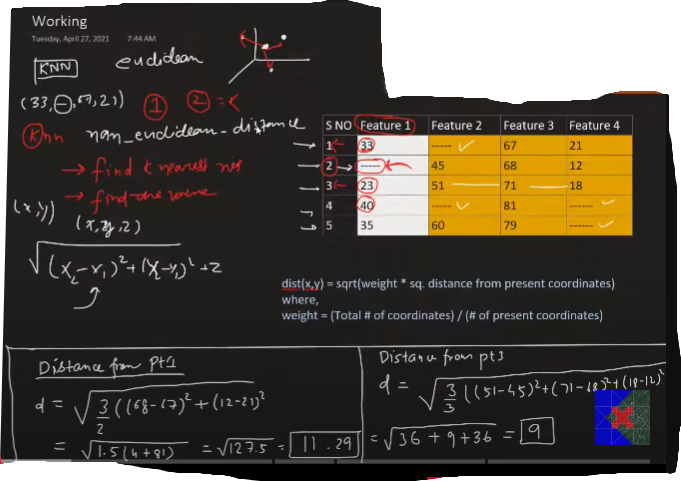

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.impute import KNNImputer,SimpleImputer
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('train_41.csv')[['Age','Pclass','Fare','Survived']]

In [3]:
df.head(5)

,Age,Pclass,Fare,Survived
0,22.0,3,7.2500,0
1,38.0,1,71.2833,1
2,26.0,3,7.9250,1
3,35.0,1,53.1000,1
4,35.0,3,8.0500,0


In [4]:
df.isnull().mean()*100

Age         19.86532
Pclass       0.00000
Fare         0.00000
Survived     0.00000
dtype: float64

In [5]:
x = df.drop(columns=['Survived'])
y = df['Survived']

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [7]:
x_train.head()

,Age,Pclass,Fare
30,40.0,1,27.7208
10,4.0,3,16.7000
873,47.0,3,9.0000
182,9.0,3,31.3875
876,20.0,3,9.8458


In [8]:
knn = KNNImputer(n_neighbors=3,weights='distance')

x_train_trf = knn.fit_transform(x_train)
x_test_trf = knn.fit_transform(x_test)

In [13]:
lr = LogisticRegression()

lr.fit(x_train_trf,y_train)
y_pred = lr.predict(x_test_trf)

accuracy_score(y_test,y_pred)

0.7094972067039106

In [16]:
# Comparision with Simple Imputer --> Mean

si = SimpleImputer()
x_train_trf2 = si.fit_transform(x_train)
x_test_trf2 = si.transform(x_test)


In [18]:
lr = LogisticRegression()

lr.fit(x_train_trf2,y_train)

y_pred2 = lr.predict(x_test_trf2)

accuracy_score(y_test,y_pred2)

0.6927374301675978